In [1]:
from keras import models
from keras import backend as K
from keras import losses
import os

from keras.engine.saving import model_from_json

label_helper = {'m_s1': slice(0, 3), 
                's1_1': slice(3, 30),
                's1_2': slice(30, 57),
                'm_s2': slice(57, 62),
                's2_1': slice(62, 73), 
                's2_2': slice(73, 84), 
                's2_3': slice(84, 95),
                's2_4': slice(95, 106),
                'm_s3': slice(106, 110), 
                's3_1': slice(110, 137),
                's3_2': slice(137, 164), 
                's3_3': slice(164, 191)}

def plate_loss(y_true, y_pred):
    loss_s1_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s1']], y_pred[:, label_helper['m_s1']]))
    loss_s1_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s1_1']], y_pred[:, label_helper['s1_1']]))
    loss_s1_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s1_2']], y_pred[:, label_helper['s1_2']]))
    
    loss_s2_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s2']], y_pred[:, label_helper['m_s2']]))
    loss_s2_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_1']], y_pred[:, label_helper['s2_1']]))
    loss_s2_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_2']], y_pred[:, label_helper['s2_2']]))
    loss_s2_3 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_3']], y_pred[:, label_helper['s2_3']]))
    loss_s2_4 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_4']], y_pred[:, label_helper['s2_4']]))
    
    loss_s3_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s3']], y_pred[:, label_helper['m_s3']]))
    loss_s3_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_1']], y_pred[:, label_helper['s3_1']]))
    loss_s3_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_2']], y_pred[:, label_helper['s3_2']]))
    loss_s3_3 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_3']], y_pred[:, label_helper['s3_3']]))
    
    loss_s1 = loss_s1_0 + loss_s1_1 + loss_s1_2
    loss_s2 = loss_s2_0 + loss_s2_1 + loss_s2_2 + loss_s2_3 + loss_s2_4
    loss_s3 = loss_s3_0 + loss_s3_1 + loss_s3_2 + loss_s3_3
    return loss_s1 + loss_s2 + loss_s3

losses.plate_loss = plate_loss

root = '.'
dataset_dir = os.path.join(root, 'generated', 'create_sample_extractor3_1')
json_file = open(os.path.join(dataset_dir, 'modelz2.json'), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(os.path.join(dataset_dir, "extractorz2_epoch-76_loss-0.9559_val_loss-2.1267.h5"))
print("Loaded model from disk")


Using TensorFlow backend.


Loaded model from disk


In [2]:
"""
Label Decoder
"""

label_helper = {'m_s1': slice(0, 3), 
                's1_1': slice(3, 30),
                's1_2': slice(30, 57),
                'm_s2': slice(57, 62),
                's2_1': slice(62, 73), 
                's2_2': slice(73, 84), 
                's2_3': slice(84, 95),
                's2_4': slice(95, 106),
                'm_s3': slice(106, 110), 
                's3_1': slice(110, 137),
                's3_2': slice(137, 164), 
                's3_3': slice(164, 191)}

def logits_decoder(label):
    # Convert label to readable character
    s1_0 = label[0:3]
    s1_1 = label[3:30]
    s1_2 = label[30:57]
    
    s2_0 = label[57:62]
    s2_1 = label[62:73]
    s2_2 = label[73:84]
    s2_3 = label[84:95]
    s2_4 = label[95:106]
    
    s3_0 = label[106:110]
    s3_1 = label[110:137]
    s3_2 = label[137:164]
    s3_3 = label[164:191]
    
    s1_0 = np.argmax(s1_0)
    s1_1 = np.argmax(s1_1)
    s1_2 = np.argmax(s1_2)
    
    s2_0 = np.argmax(s2_0)
    s2_1 = np.argmax(s2_1)
    s2_2 = np.argmax(s2_2)
    s2_3 = np.argmax(s2_3)
    s2_4 = np.argmax(s2_4)
    
    s3_0 = np.argmax(s3_0)
    s3_1 = np.argmax(s3_1)
    s3_2 = np.argmax(s3_2)
    s3_3 = np.argmax(s3_3)
    
    s1 = [s1_0, s1_1, s1_2]
    s2 = [s2_0, s2_1, s2_2, s2_3, s2_4]
    s3 = [s3_0, s3_1, s3_2, s3_3]
    return s1, s2, s3


def label_decoder(s1, s2, s3):
    """
    Label Decoder
    Output real value from the label
    e.g 'AE 2343 PY'
    """
    
    CHAR_DICT = " ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    NUMBER_DICT = " 0123456789"
    
    s1 = CHAR_DICT[s1[1]] + CHAR_DICT[s1[2]]
    s2 = NUMBER_DICT[s2[1]] + NUMBER_DICT[s2[2]] + NUMBER_DICT[s2[3]] + NUMBER_DICT[s2[4]]
    s3 = CHAR_DICT[s3[1]] + CHAR_DICT[s3[2]] + CHAR_DICT[s3[3]]
    # model.summary()
    return s1 + ' ' + s2 + ' ' + s3  


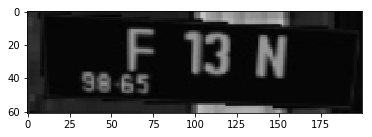

'F  13   N  '

In [4]:
"""
Test with single image from train dataset
Compare with actual result
"""
import cv2 as cv2
from matplotlib import pyplot as plt
import numpy as np

img_filename = '190.jpg'
img_data = cv2.imread(os.path.join(dataset_dir, 'train_dataset', img_filename))
img_data = cv2.resize(img_data, (200, 61))

plt.imshow(img_data)
plt.show()
img_data = np.expand_dims(img_data, 0)
output = loaded_model.predict(img_data)
s1, s2, s3 = logits_decoder(output[0])
label_decoder(s1, s2, s3)

In [10]:
"""
Inference with webcam
"""

import cv2 as cv2
import numpy as np
from imutils.video import FPS
from multiprocessing import Pool
import time

font = cv2.FONT_HERSHEY_SIMPLEX
print('clean')
video = cv2.VideoCapture(0)
fps = FPS().start()
# ret, frame = video.read()
# video.release()
# img = np.array(frame)
# cv2.imshow('frame', frame)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
while True:
#     print('1')
    ret, frame = video.read()  # Get video per frame
#     print('2')
    frame = np.array(frame)

    """
    Inferencing goes in here
    """
    # TODO: Inferencing
    # Process the image
#     image = frame[60:121, 200:400]
    image = frame[20:243, 10:610]
    image = cv2.resize(image, (200, 61))
    image = np.expand_dims(image, 0)
    output = loaded_model.predict(image)
    # Deep learning Prediction
    s1, s2, s3 = logits_decoder(output[0])
    result = label_decoder(s1, s2, s3)
#     print('3')
#     if s1[0] is not 0 and s2[0] is not 0 and s3[0] is not 0:
#         print('4')
#         print(str([s1, s2, s3]))
#         key = cv2.waitKey(1)
#     else:
#         print('5')
#         print(label_decoder(s1, s2, s3))
#         key = cv2.waitKey(1)
    # Show processed image
#     frame = cv2.rectangle(frame, (200, 60), (400, 121), (0, 0, 255), 5)
    frame = cv2.putText(frame,str(result),(100,300), font, 2,(255,255,255),2,cv2.LINE_AA)
    frame = cv2.rectangle(frame, (20, 10), (610, 243), (0, 0, 255), 5)
    cv2.imshow('frame', frame)
#     time.sleep(0.1)
    fps.update()
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

clean


In [13]:
video.release()
cv2.destroyAllWindows()